#**Exponential smoothing**



##  install these libraries using pip:



In [ ]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

## Loading dataset

In [99]:
df = pd.read_csv('/content/traffic.csv')
print(df.head())
#DateTime

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


## Visualizing the data





In [100]:
df = df.drop(['Junction','ID'],axis=1)
df.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [109]:
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
df.set_index('DateTime', inplace=True)

In [69]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2017-04-26 19:00:00 to 2016-10-24 21:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vehicles  962 non-null    int64
dtypes: int64(1)
memory usage: 15.0 KB


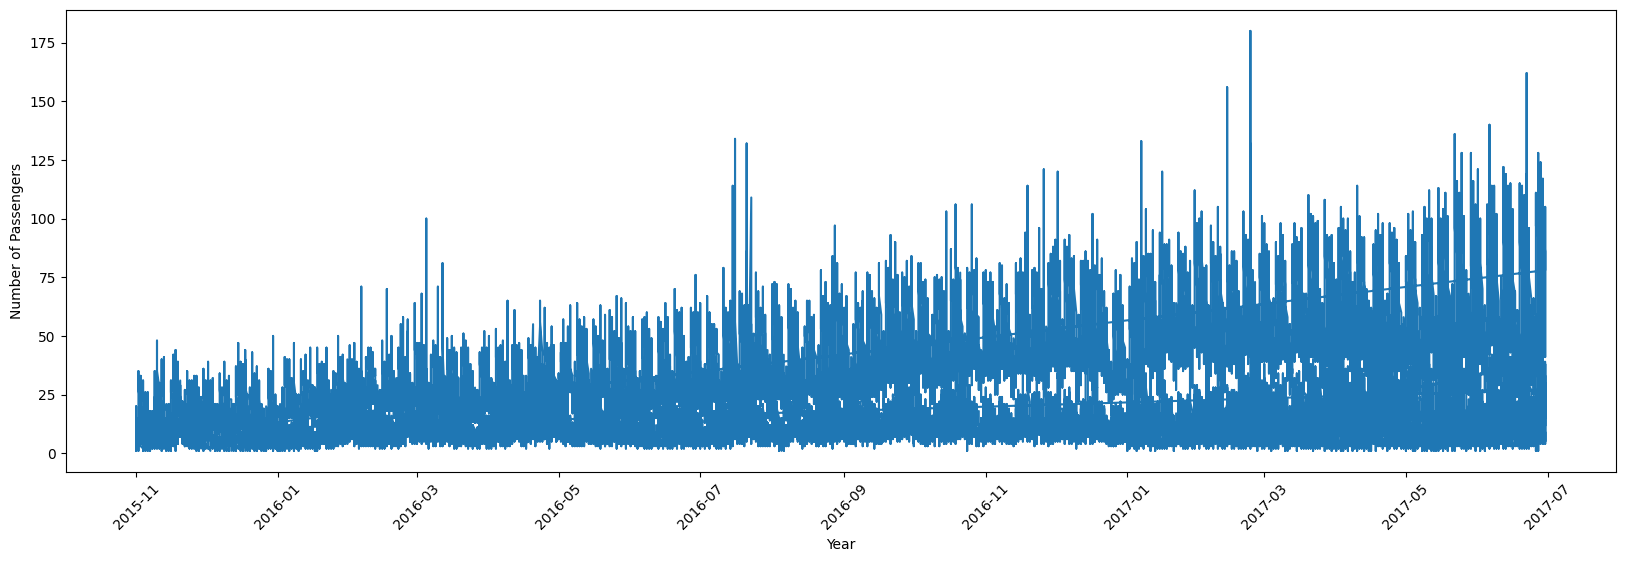

In [111]:
plt.figure(figsize=(20, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

#**Single Exponential smoothing**





In [112]:
model = SimpleExpSmoothing(df)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Making predictions





In [113]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

48120    12.0
48121    12.0
48122    12.0
48123    12.0
48124    12.0
48125    12.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [114]:
forecast_single = model_single_fit.forecast(40)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Single Exponential Smoothing




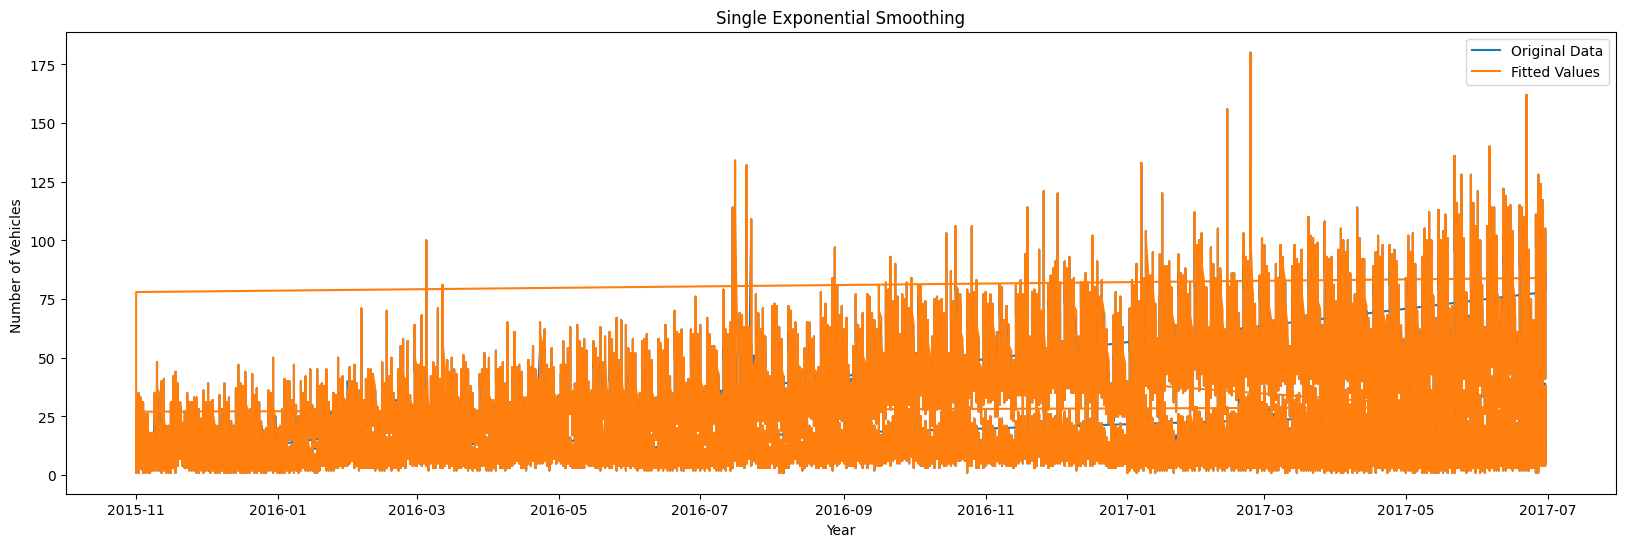

In [116]:
plt.figure(figsize=(20, 6))
plt.plot(df, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles ')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [118]:
model_double = Holt(df)
model_double_fit = model_double.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Making predictions



In [119]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


48120    12.060321
48121    12.069537
48122    12.078752
48123    12.087968
48124    12.097184
48125    12.106399
dtype: float64


In [120]:
forecast_double = model_double_fit.forecast(40)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Double Exponential Smoothing




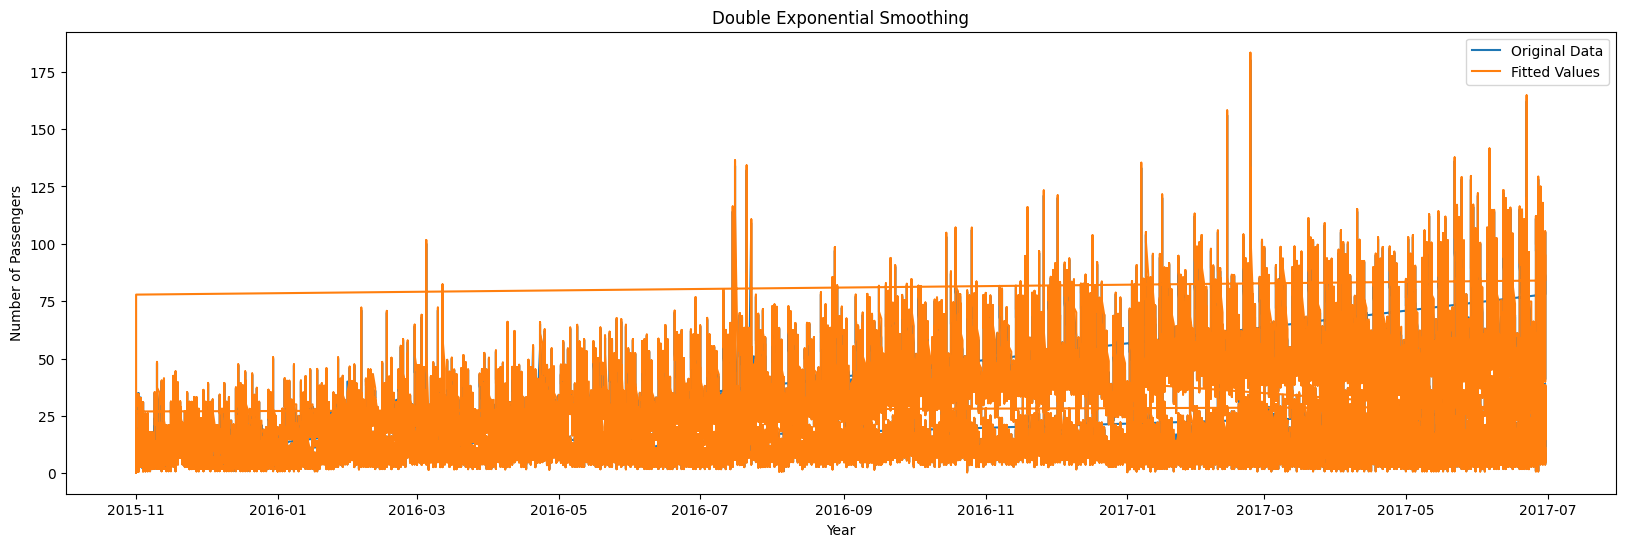

In [122]:
plt.figure(figsize=(20, 6))
plt.plot(df, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [124]:
# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    df, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## Making predictions



In [125]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


48120    12.842643
48121    11.607506
48122    12.352857
48123    12.549713
48124    11.862394
48125    11.728760
dtype: float64


In [126]:
forecast_triple = model_triple_fit.forecast(40)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualize Triple Exponential Smoothing




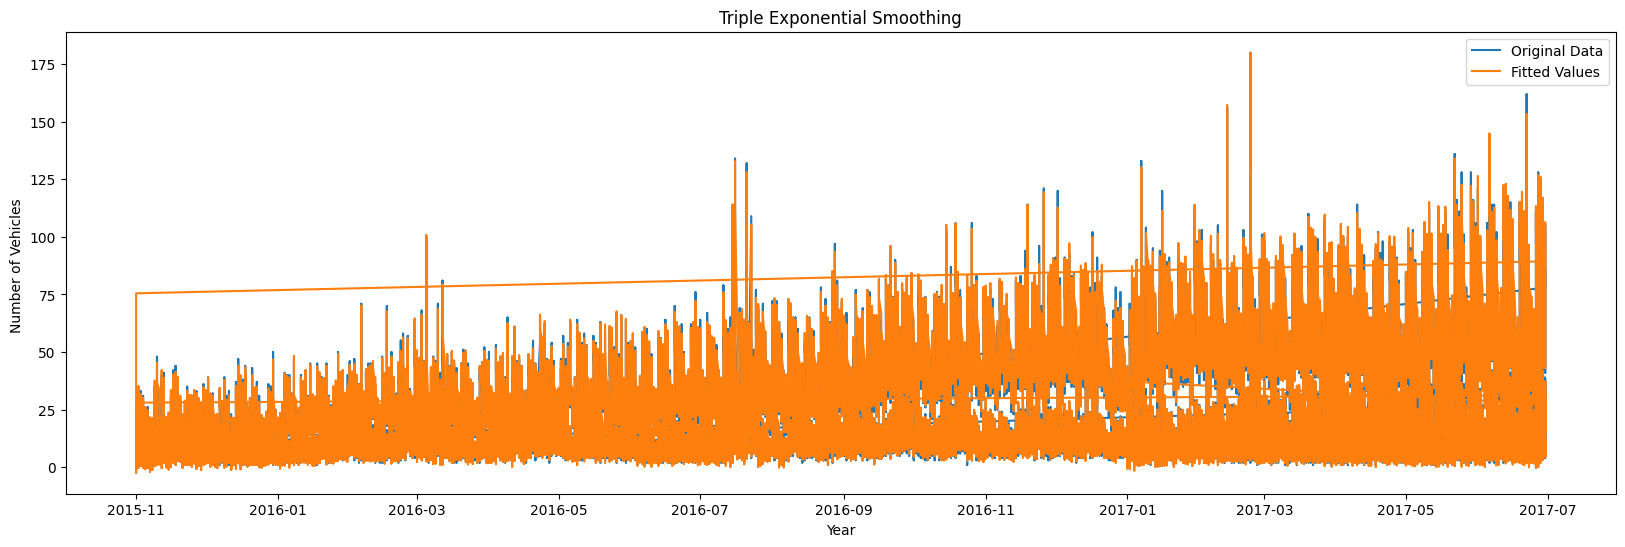

In [129]:
plt.figure(figsize=(20, 6))
plt.plot(df, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')

plt.xlabel('Year')
plt.ylabel('Number of Vehicles ')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

##**Well done :)**